# 1 day ahead prediction:

First the directional accuracy is calculated with respect to the true denoised value: The high accuracy (+-85% accross all pairs) is expected since the data shows high autocorrelation.

However to truly reflect real-life usecase it is important to compare the predicted denoised value with the actual noisy value, to see if the models predictions can be implemented to make informed trading decisions. The results decline as expected, however with a forecasting accuracy of +-60% for all pairs --- the results show the effectiveness of the models predictions and the practical value it provides with regards to forecasting future price trends.

In [13]:
def calculate_accuracy(file_path):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.where(np.sign(data['Predicted']) == np.sign(data['Actual']), 1, 0)
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Correct'] == 1))
    TN = np.sum((data['Predicted'] <= 0) & (data['Correct'] == 1))
    FP = np.sum((data['Predicted'] > 0) & (data['Correct'] == 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Correct'] == 0))
    
    # Convert continuous predictions to binary class labels
    data['Predicted'] = (data['Predicted'] > 0).astype(int)
    data['Actual'] = (data['Actual'] > 0).astype(int)
    
    # Calculate the AUC
    auc = roc_auc_score(data['Actual'], data['Predicted'])
    
    # Calculate Precision, Recall, F1 Score, and Specificity
    precision = precision_score(data['Actual'], data['Predicted'])
    recall = recall_score(data['Actual'], data['Predicted'])
    f1 = f1_score(data['Actual'], data['Predicted'])
    specificity = TN / (TN + FP)
    
    return accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity



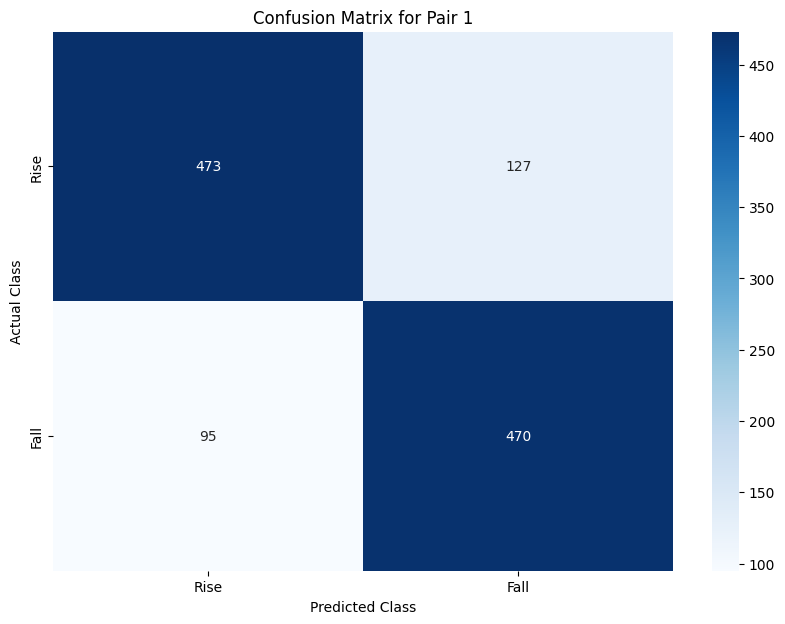

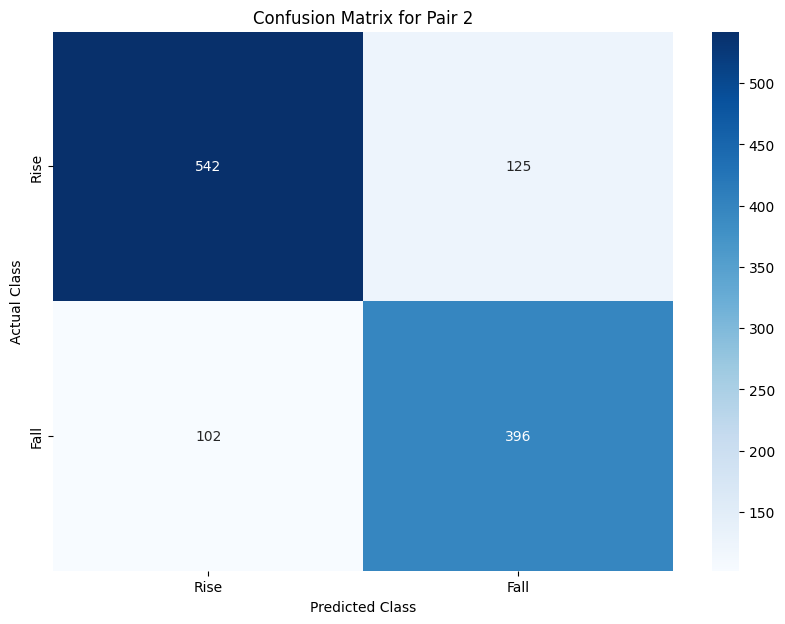

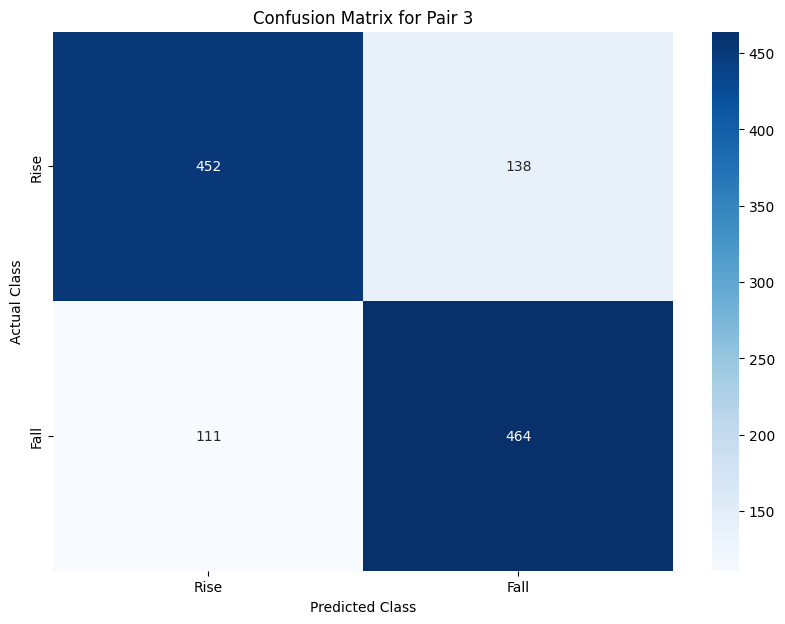

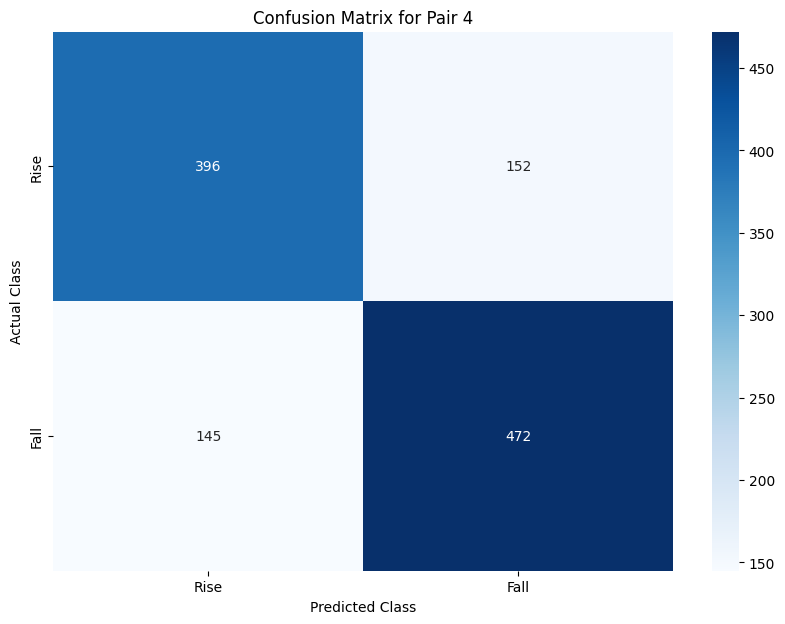

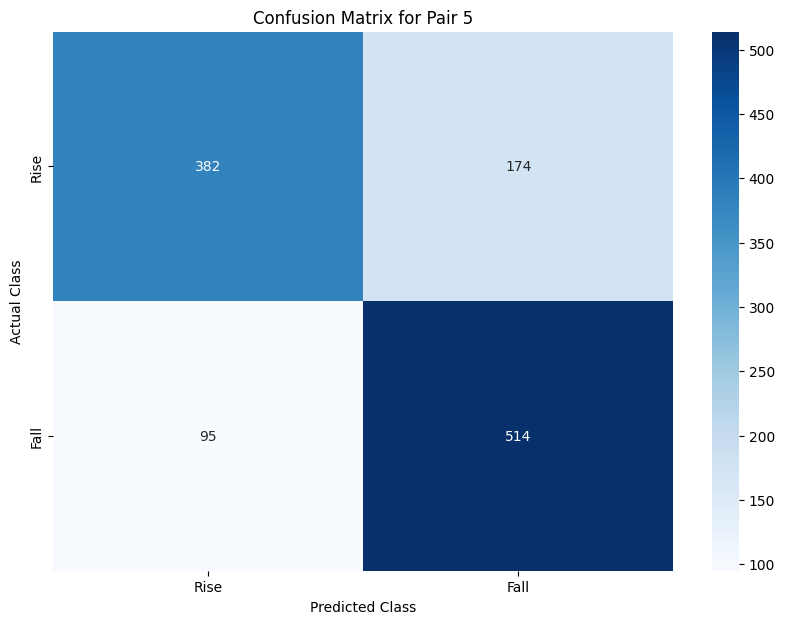

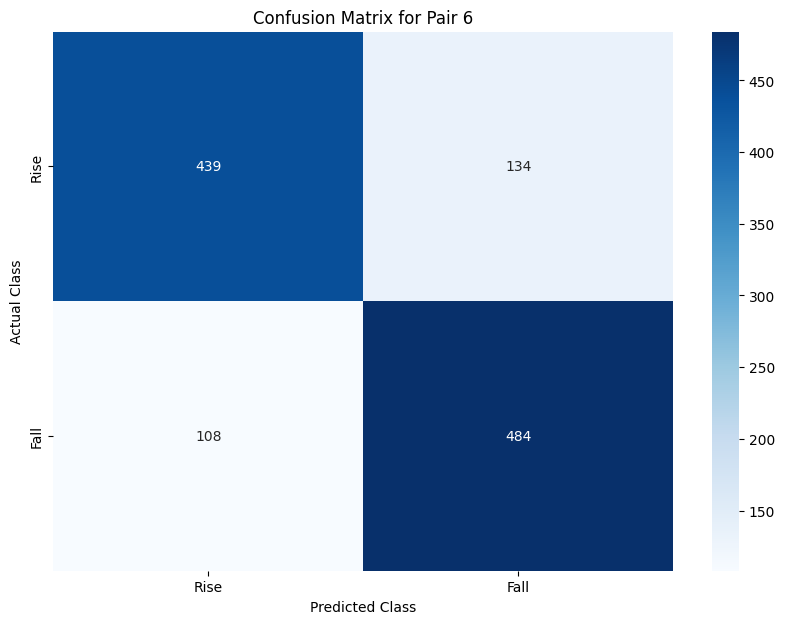

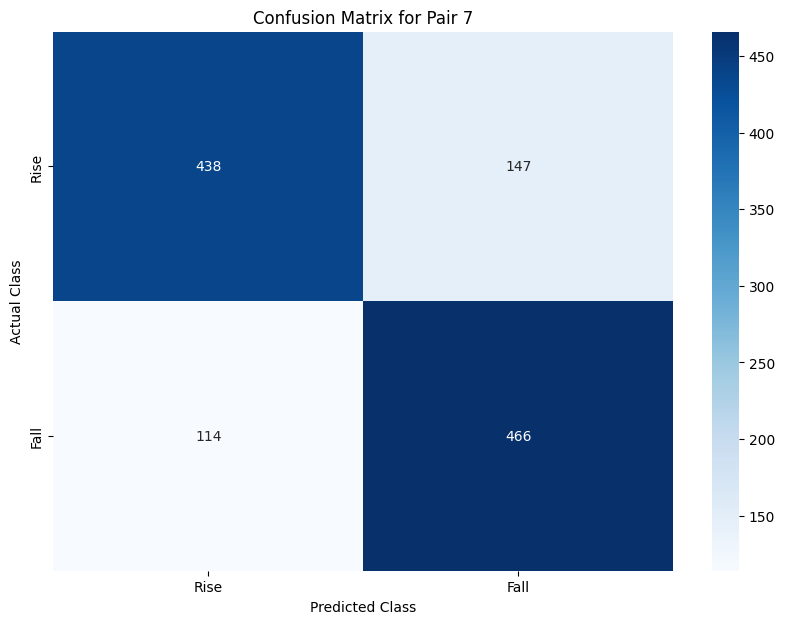

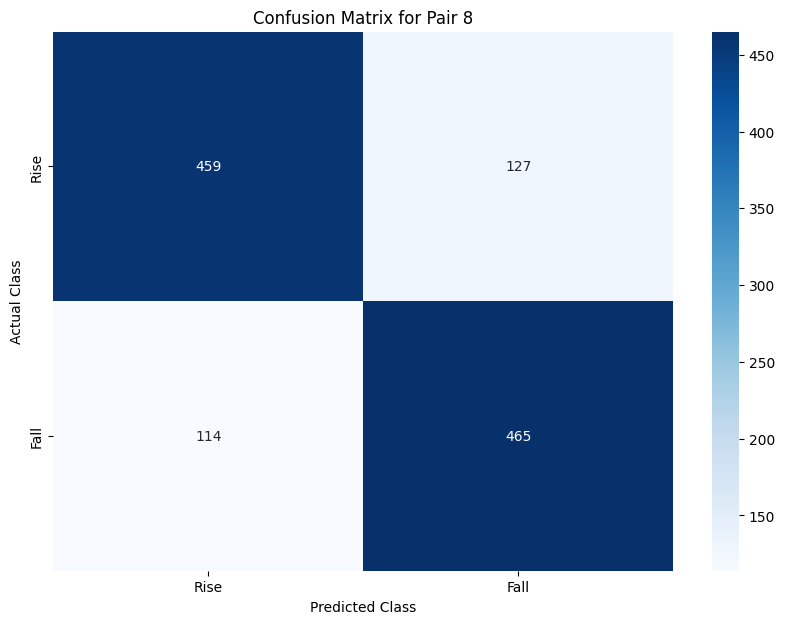

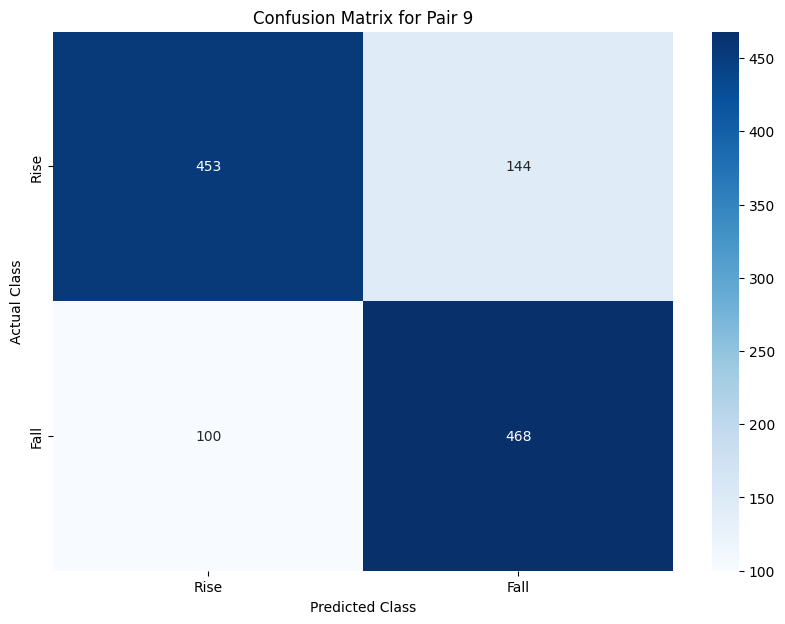

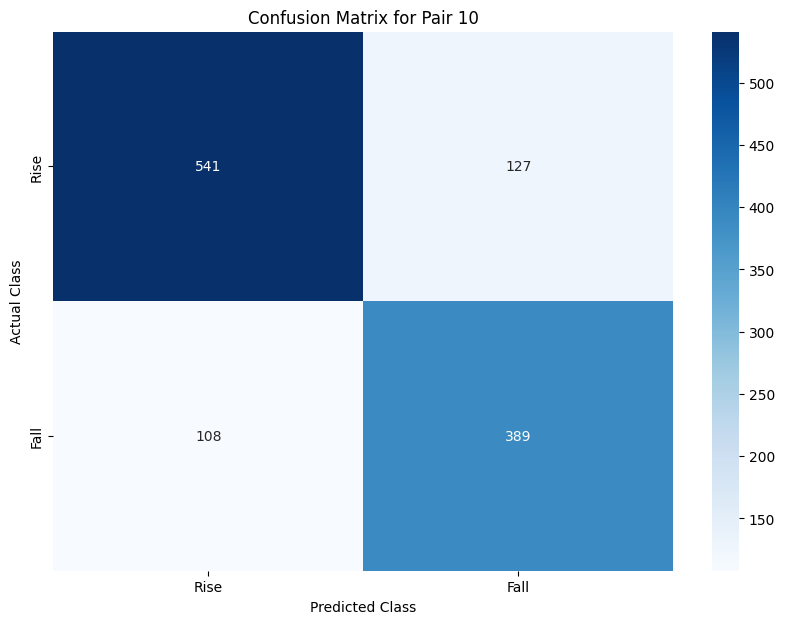

   Pair  Accuracy   TP   TN   FP   FN       AUC  Precision    Recall  \
0     1  0.809442  473  470  127   95  0.810008   0.788333  0.832746   
1     2  0.805150  542  396  125  102  0.800846   0.812594  0.841615   
2     3  0.786266  452  464  138  111  0.786803   0.766102  0.802842   
3     4  0.745064  396  472  152  145  0.744194   0.722628  0.731978   
4     5  0.769099  382  514  174   95  0.773966   0.687050  0.800839   
5     6  0.792275  439  484  134  108  0.792865   0.766143  0.802559   
6     7  0.775966  438  466  147  114  0.776837   0.748718  0.793478   
7     8  0.793133  459  465  127  114  0.793260   0.783276  0.801047   
8     9  0.790558  453  468  144  100  0.791937   0.758794  0.819168   
9    10  0.798283  541  389  127  108  0.793733   0.809880  0.833590   

         F1  Specificity  
0  0.809932     0.787270  
1  0.826850     0.760077  
2  0.784042     0.770764  
3  0.727273     0.756410  
4  0.739593     0.747093  
5  0.783929     0.783172  
6  0.770449     0.

In [14]:
# Example usage:
results = []
for i in range(1, 11):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'AUC': auc, 'Precision': precision, 'Recall': recall, 'F1': f1, 'Specificity': specificity})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)